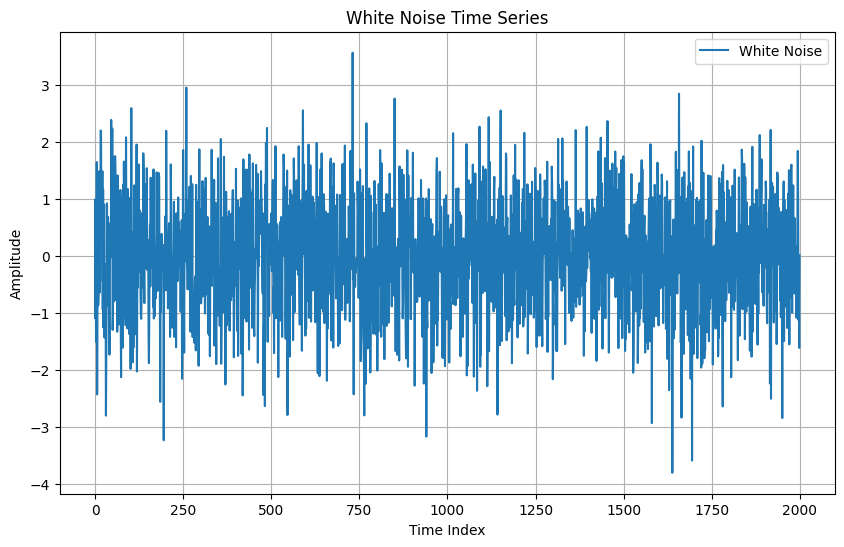

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Part (a): White Noise Time Series
# Generate white noise process with zero mean and unity variance
np.random.seed(123)  # For reproducibility
N = 2000
white_noise = np.random.normal(loc=0, scale=1, size=N)

# Assign time index from 0 to 1999
time_index = np.arange(N)

# Plot white noise
plt.figure(figsize=(10, 6))
plt.plot(time_index, white_noise, label='White Noise')
plt.title('White Noise Time Series')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

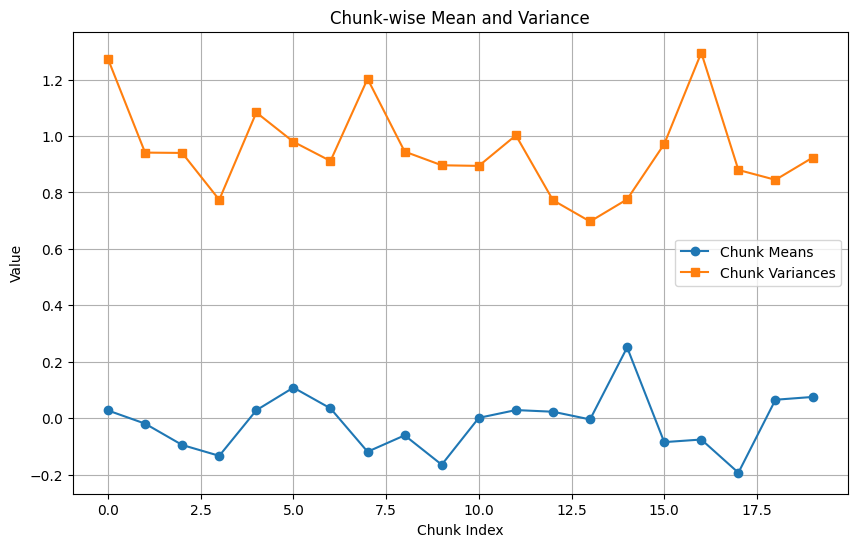

In [ ]:
# Check stationarity by dividing the series into chunks of 100 samples
chunk_size = 100
num_chunks = N // chunk_size
chunk_means = []
chunk_variances = []

for i in range(num_chunks):
    chunk = white_noise[i * chunk_size: (i + 1) * chunk_size]
    chunk_means.append(np.mean(chunk))
    chunk_variances.append(np.var(chunk))

# Plot chunk-wise mean and variance
plt.figure(figsize=(10, 6))
plt.plot(range(num_chunks), chunk_means, label='Chunk Means', marker='o')
plt.plot(range(num_chunks), chunk_variances, label='Chunk Variances', marker='s')
plt.title('Chunk-wise Mean and Variance')
plt.xlabel('Chunk Index')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

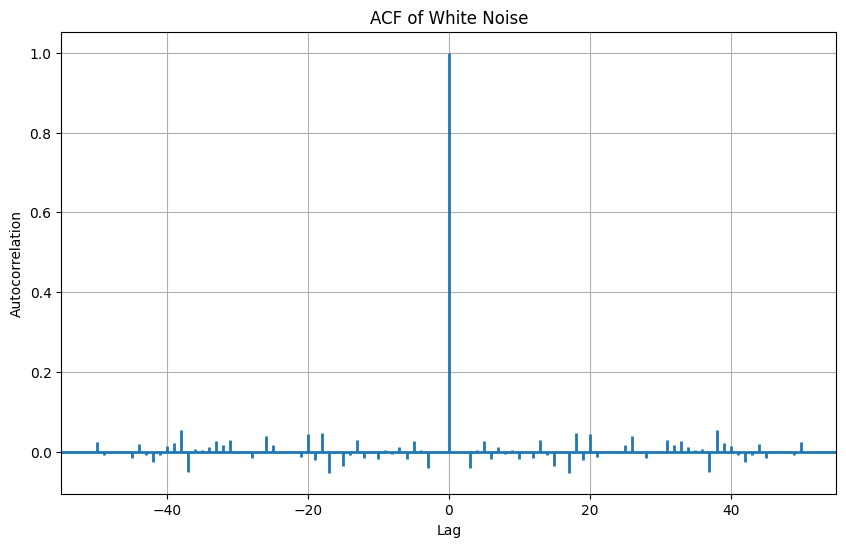

In [ ]:
# Calculate and plot ACF of white noise using matplotlib's acorr
plt.figure(figsize=(10, 6))
plt.acorr(white_noise, maxlags=50, usevlines=True, normed=True, lw=2)
plt.title('ACF of White Noise')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

Enter the value of M (M > 1): 3


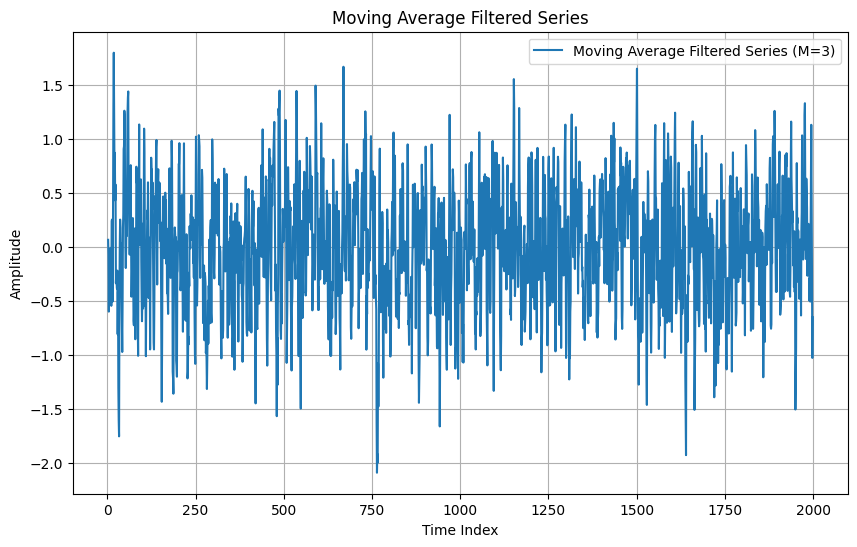

In [ ]:
# Part (b): Moving Average Filtering of White Noise
# Input M (Number of taps for moving average filter)
M = int(input("Enter the value of M (M > 1): "))
if M <= 1:
    raise ValueError("M must be greater than 1.")

# Apply M-tap Moving Average Filter
filtered_series = np.convolve(white_noise, np.ones(M) / M, mode='valid')

# Plot the filtered data
filtered_time_index = np.arange(M - 1, N)
plt.figure(figsize=(10, 6))
plt.plot(filtered_time_index, filtered_series, label=f'Moving Average Filtered Series (M={M})')
plt.title('Moving Average Filtered Series')
plt.xlabel('Time Index')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

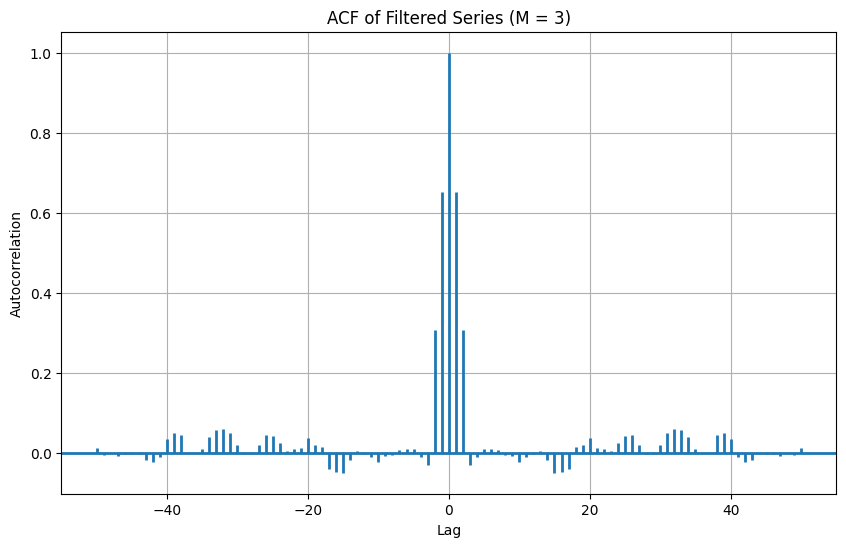

In [ ]:
# Calculate and plot ACF of filtered series using matplotlib's acorr
plt.figure(figsize=(10, 6))
plt.acorr(filtered_series, maxlags=50, usevlines=True, normed=True, lw=2)
plt.title(f'ACF of Filtered Series (M = {M})')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid()
plt.show()

In [ ]:
# Compare Mean and Variance of Original and Filtered Series
mean_original = np.mean(white_noise)
variance_original = np.var(white_noise)
mean_filtered = np.mean(filtered_series)
variance_filtered = np.var(filtered_series)

print(f"Original Series: Mean = {mean_original}, Variance = {variance_original}")
print(f"Filtered Series: Mean = {mean_filtered}, Variance = {variance_filtered}")


Original Series: Mean = -0.015587484342459114, Variance = 0.9602538813243864
Filtered Series: Mean = -0.01514321577150545, Variance = 0.3188404558739112
